## Inject Bugs & Run Experiment

![Inject Bugs & Run Experiment](./pic/RL_Testing.drawio.png)

#### Frozenlake Testbed Experiment

- Find log files in RLTestig/logs/frozenlake

In [1]:
import bug_lib as BL


bug_version_list = [
    [],
    [0],
    [1],
    [2],
    [3],
    [4],
    [6],
    [7],
    [8],
    [9],
    [10],
    [11],
    [12],
    [13],
    [14],
    [15],
]

bug_version = [27]


In [2]:
BL.cover_then_inject_bugs(bug_version)
# After this step, Restart the ipynb environment

import warnings
from abc import ABC, abstractmethod
from typing import Any, Dict, Generator, List, Optional, Tuple, Union

import numpy as np
import torch as th
from gymnasium import spaces

from stable_baselines3.common.preprocessing import get_action_dim, get_obs_shape
from stable_baselines3.common.type_aliases import (
    DictReplayBufferSamples,
    DictRolloutBufferSamples,
    ReplayBufferSamples,
    RolloutBufferSamples,
)
from stable_baselines3.common.utils import get_device
from stable_baselines3.common.vec_env import VecNormalize

try:
    # Check memory used by replay buffer when possible
    import psutil
except ImportError:
    psutil = None


class BaseBuffer(ABC):
    """
    Base class that represent a buffer (rollout or replay)

    :param buffer_size: Max number of element in the buffer
    :param observation_space: Observation space
    :param action_space: Action space
    :param device: PyTorch device
        to which the values will be converted
    :param n_env

In [ ]:
import frozenlake.testing_SB3_Frozenlake as Frozenlake_Experiment
Frozenlake_Experiment.main(bug_version=bug_version, rounds=10, epochs=300, model_type='ppo')

#### Mountaincar Testbed (continous) Experiment

- Find log files in RLTestig/logs/mountaincar

In [1]:
import bug_lib as BL


bug_version_list = [
    [],
    [5],
    [6],
    [7],
    [8],
    [10],
    [11],
    [12],
    [13],
    [14],
    [15]
]

bug_version = [31]

In [4]:
BL.cover_then_inject_bugs(bug_version)

from typing import Any, ClassVar, Dict, Optional, Type, TypeVar, Union

import torch as th
from gymnasium import spaces
from torch.nn import functional as F

from stable_baselines3.common.buffers import RolloutBuffer
from stable_baselines3.common.on_policy_algorithm import OnPolicyAlgorithm
from stable_baselines3.common.policies import ActorCriticCnnPolicy, ActorCriticPolicy, BasePolicy, MultiInputActorCriticPolicy
from stable_baselines3.common.type_aliases import GymEnv, MaybeCallback, Schedule
from stable_baselines3.common.utils import explained_variance

SelfA2C = TypeVar("SelfA2C", bound="A2C")


class A2C(OnPolicyAlgorithm):
    """
    Advantage Actor Critic (A2C)

    Paper: https://arxiv.org/abs/1602.01783
    Code: This implementation borrows code from https://github.com/ikostrikov/pytorch-a2c-ppo-acktr-gail and
    and Stable Baselines (https://github.com/hill-a/stable-baselines)

    Introduction to A2C: https://hackernoon.com/intuitive-rl-intro-to-advantage-actor-critic-a2c

In [2]:
import mountaincar.testing_SB3_Mountaincar as Mountaincar_Experiment


Mountaincar_Experiment.main(bug_version=bug_version, rounds=10, epochs=700, model_type='a2c', max_steps=500)

(array([-0.5370181,  0.       ], dtype=float32), {})
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
round: 0----
creating new model
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


C:\Users\hkson\research\SB3 TEST\stable-baselines3-testing-new\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


------------------------------------
| time/                 |          |
|    fps                | 806      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.38    |
|    explained_variance | 0.82     |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.101   |
|    std                | 0.958    |
|    value_loss         | 0.0148   |
------------------------------------


c:\Users\hkson\anaconda3\envs\SB_Testing_new\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.get_state_action_pairs to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_state_action_pairs` for environment variables or `env.get_wrapper_attr('get_state_action_pairs')` that will search the reminding wrappers.
  logger.warn(


------------------------------------
| time/                 |          |
|    fps                | 836      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.36    |
|    explained_variance | -1.22    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.459   |
|    std                | 0.943    |
|    value_loss         | 0.145    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 845      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.35    |
|    explained_variance | -0.108   |
|    learning_rate      | 0.0007   |
|    n_updates          | 299      |
|    policy_loss        | 2.65     |
|

## Validation Part

In [5]:
import log_parser
import pandas as pd
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import config_parser
from scipy.stats import binomtest


root_dir = config_parser.parserConfig()['root_dir']
    
def analyze_data_trend_and_convergence_v2(data, trend_threshold=0, convergence_range=20, fluctuation_range=0.3, convergence_window_ratio=0.05, negative_fluctuation_limit=0.05, show=False, title="trend", confidence_level=0.95):
    # 计算整个数据集趋势线的斜率
    slope, _, _, _, _ = linregress(range(len(data)), data)
    upwards_trend = slope > trend_threshold
    
    # 确定收敛窗口的大小为数据点总数的一定比例
    window_size = max(int(len(data) * convergence_window_ratio), 1)
    
    convergence_point = None
    no_large_negative_fluctuation = True
    
    ptps = []
    same_ptps = []
    lower_bound = 0
    # 寻找收敛点
    for i in range(len(data) - window_size):
        window_data = data[i:i + window_size]
        ptps.append(np.ptp(window_data))

    for i in range(len(data) - window_size):
        if i == 0:
            same_ptps.append(0)
        else:
            if abs(ptps[i] - ptps[i - 1]) < negative_fluctuation_limit and ptps[i] < fluctuation_range:
                same_ptps.append(same_ptps[i - 1] + 1)
            else:
                same_ptps.append(0)

    for i in range(len(data) - window_size):
        if same_ptps[i] > convergence_range:
            convergence_point = i - convergence_range
            lower_bound = data[i - convergence_range] - ptps[i - convergence_range]
            break
    
    if convergence_point is not None:
        post_convergence_data = data[convergence_point:]
        for i in range(1, len(post_convergence_data)):
            if post_convergence_data[i] < lower_bound:
                no_large_negative_fluctuation = False
                break



    # 可视化
    print(upwards_trend, no_large_negative_fluctuation, no_large_negative_fluctuation and upwards_trend)
    if show:
        plt.figure(figsize=(10, 5))
        plt.plot(data, marker='o', label='data')
        plt.plot(range(len(data)), [slope * x + data[0] for x in range(len(data))], 'r--', label=f'slope (slope={slope:.2f})')
        if convergence_point is not None:
            plt.axvline(x=convergence_point, color='g', linestyle='--', label='convergence_point')
            plt.axhline(y=lower_bound, color='orange', linestyle='--', label='confidence_bottom')
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()

    return (upwards_trend, no_large_negative_fluctuation)

def analyze_data_trend_and_convergence(data, trend_threshold=0, convergence_range=0.01, fluctuation_range=0.05, convergence_window_ratio=0.05, negative_fluctuation_limit=0.05, show=False, title="trend", confidence_level=0.95):
    # 计算整个数据集趋势线的斜率
    slope, _, _, _, _ = linregress(range(len(data)), data)
    upwards_trend = slope > trend_threshold
    
    # 确定收敛窗口的大小为数据点总数的一定比例
    window_size = max(int(len(data) * convergence_window_ratio), 1)
    
    convergence_point = None
    no_large_negative_fluctuation = True
    
    # 寻找收敛点
    for i in range(len(data) - window_size):
        window_data = data[i:i + window_size]
        if np.ptp(window_data) < convergence_range:
            convergence_point = i
            break

    '''
    首先找到收敛点，然后计算收敛点之后数据的平均值和标准差，接着确定置信区间。然后，我们检查收敛点之后的每个数据点，确保没有数据点显著性地低于置信区间下限。如果所有数据点都在置信区间内，或者即使低于置信区间下限，但未超出设定的negative_fluctuation_limit，则认为没有出现大规模负向波动。
    '''
    # 如果找到收敛点，检查之后是否有大规模负向波动
    if convergence_point is not None:
        post_convergence_data = data[convergence_point:]
        mean = np.mean(post_convergence_data)
        std = np.std(post_convergence_data, ddof=1)
        confidence_coefficient = stats.norm.ppf(1 - (1 - confidence_level) / 2)
        confidence_interval = (mean - confidence_coefficient * std, mean + confidence_coefficient * std)
        
        for i in range(1, len(post_convergence_data)):
            if post_convergence_data[i] < post_convergence_data[i - 1] - negative_fluctuation_limit and post_convergence_data[i] < confidence_interval[0]:
                no_large_negative_fluctuation = False
                break

    # 可视化
    if show:
        plt.figure(figsize=(10, 5))
        plt.plot(data, marker='o', label='data')
        plt.plot(range(len(data)), [slope * x + data[0] for x in range(len(data))], 'r--', label=f'slope (slope={slope:.2f})')
        if convergence_point is not None:
            plt.axvline(x=convergence_point, color='g', linestyle='--', label='convergence_point')
            plt.axhline(y=confidence_interval[0], color='orange', linestyle='--', label='confidence_bottom')
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()

    return (upwards_trend, no_large_negative_fluctuation)

def linear_regression_with_convergence_slop_check(data, title='Data Trend Analysis', window_size=5, threshold_slope=0, show=False):
    
    series = pd.Series(data)

    # 计算标准差的移动平均
    rolling_std = series.rolling(window=window_size).std().dropna()

    # 使用线性回归判断移动标准差的趋势
    std_slope, std_intercept, _, _, _ = linregress(range(len(rolling_std)), rolling_std)

    # 使用线性回归判断原始数据的趋势
    slope, intercept, _, _, _ = linregress(range(len(data)), data)
    
    if show:
        plt.figure(figsize=(12, 6))
        
        # 绘制原始数据和趋势线
        plt.subplot(1, 2, 1)
        plt.plot(data, label='Original Data', marker='o')
        plt.plot(range(len(data)), intercept + slope * np.asarray(range(len(data))), 'r', label=f'Trend Line: slope={slope:.2f}')
        plt.legend()
        plt.title(title)
        
        # 绘制移动标准差和其趋势线
        plt.subplot(1, 2, 2)
        plt.plot(rolling_std.index, rolling_std, label='Moving Standard Deviation', marker='o')
        plt.plot(rolling_std.index, std_intercept + std_slope * np.asarray(range(len(rolling_std))), 'g', label=f'STD Trend Line: slope={std_slope:.2f}')
        plt.axhline(y=0, color='r', linestyle='--', label='Zero Slope Reference')
        plt.legend()
        plt.title('Standard Deviation Trend Analysis')
        
        plt.tight_layout()
        plt.show()

    # 判断标准差的趋势是否为负，并且原始数据的趋势是否为正
    if slope >= 0 and std_slope <= threshold_slope:
        return "true"
    else:
        return "false"


def linear_regression_with_convergence_check(data, title='Data Trend Analysis', window_size=5, threshold=0.05, show=False):
    
    # 将数据转换成Pandas Series对象
    series = pd.Series(data)

    # 计算标准差的移动平均
    rolling_std = series.rolling(window=window_size).std()

    # 判断最后一个窗口的标准差是否小于阈值，确定是否收敛
    is_converged = rolling_std.iloc[-1] < threshold

    # 使用线性回归判断趋势
    slope, intercept, r_value, p_value, std_err = linregress(range(len(data)), data)
    
    if show:
        # 绘制数据和趋势线以及移动标准差
        plt.figure(figsize=(12, 6))
        
        # 绘制原始数据和趋势线
        plt.subplot(1, 2, 1)
        plt.plot(data, label='Original Data', marker='o')
        plt.plot(range(len(data)), intercept + slope * np.asarray(range(len(data))), 'r', label=f'Trend Line: slope={slope:.2f}')
        plt.legend()
        plt.title(title)
        
        # 绘制移动标准差
        plt.subplot(1, 2, 2)
        plt.plot(rolling_std, label='Moving Standard Deviation')
        plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
        plt.legend()
        plt.title('Data Convergence Check')
        
        plt.tight_layout()
        plt.show()

    # 如果斜率大于或等于0，并且数据收敛，则返回True
    if slope < 0 or not is_converged:
        return "false"
    else:
        return "true"

    

def test_true_proportion(num_samples, num_true, sig_level=0.05, expected_prob=0.95):
    """
    对观察到的 'true' 样本数进行二项检验。

    :param num_samples: 样本总数
    :param num_true: 观察到的 'true' 样本数
    :param sig_level: 显著性水平（默认为 0.05）
    :param expected_prob: 预期成功概率（默认为 0.5）
    :return: p 值和是否显著
    """
    # 计算二项检验的 p 值
    p_value = binomtest(k=num_true, n=num_samples, p=expected_prob, alternative='greater')

    # 判断是否显著
    is_significant = p_value < sig_level

    return p_value, is_significant


def bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[]')), show_fig=False):
    # 使用 Path.rglob() 获取所有子文件
    # '**/*' 表示匹配所有的文件和文件夹, 如果只想匹配文件, 使用 '**/*.*'
    bug_free_log_list = [file for file in bug_free_log_path.rglob('*') if file.is_file()]
    print(bug_free_log_list)

    result = []
    accuracy_result = []
    convergance_result = []
    for path in bug_free_log_list:
        # print(log_parser.parse_log_file(path))
        data = log_parser.parse_log_file_fuzzy(path)
        if len(data)> 0:
            # temp = linelar_regression(data, title=path, show=show_fig)
            # temp = linear_regression_with_convergence_check(data, title=path, show=show_fig)
            # temp = linear_regression_with_convergence_slop_check(data, title=path, show=show_fig)
            temp = analyze_data_trend_and_convergence_v2(data, title=path, show=show_fig)
        # result.append(temp)
        accuracy_result.append(temp[0])
        convergance_result.append(temp[1])
        result.append(temp[0] and temp[1])

    # p_value = binomtest(result.count('true'), len(result), alternative='greater')
    # print(p_value)
    # print(binomtest(accuracy_result.count(True), len(result), alternative='greater'))
    # print(binomtest(convergance_result.count(True), len(result), alternative='greater'))
    print(binomtest(result.count(True), len(result), alternative='greater'))

    
def bin_test_mountaincar(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Mountaincar', 'sac', '[]')), show_fig=False):
    # 使用 Path.rglob() 获取所有子文件
    # '**/*' 表示匹配所有的文件和文件夹, 如果只想匹配文件, 使用 '**/*.*'
    bug_free_log_list = [file for file in bug_free_log_path.rglob('*') if file.is_file()]

    print(bug_free_log_list)

    # accuracy_list = []
    # 打印所有文件路径
    result = []
    accuracy_result = []
    convergance_result = []
    for path in bug_free_log_list:
        data = log_parser.parse_mountaincar_log_file(path)
        if len(data) > 0:
            # temp = linelar_regression(data, title=path, show=show_fig)
            # temp = linear_regression_with_convergence_slop_check(data, title=path, show=show_fig)
            temp = analyze_data_trend_and_convergence(data, title=path, show=show_fig)
        accuracy_result.append(temp[0])
        convergance_result.append(temp[1])
        result.append(temp[0] and temp[1])
    
    
    '''
    在进行二项检验时，零假设（null hypothesis）通常是观察到的成功次数与随机变化相一致，即成功的概率等于 expected_prob。如果实际观察到的成功次数显著高于（或低于）这个期望成功概率，那么您可能会得到一个很小的 p 值，从而拒绝零假设。
    '''
    # p_value = binomtest(result.count('true'), len(result), alternative='greater')
    # print(p_value)
    print(binomtest(accuracy_result.count(True), len(result), alternative='greater'))
    print(binomtest(convergance_result.count(True), len(result), alternative='greater'))
    print(binomtest(result.count(True), len(result), alternative='greater'))

[WindowsPath('C:/Users/hkson/research/SB3 TEST/stable-baselines3-testing-new/RLTesting/logs/Frozenlake/dqn/[0]/time_2024-03-06[0]round_0'), WindowsPath('C:/Users/hkson/research/SB3 TEST/stable-baselines3-testing-new/RLTesting/logs/Frozenlake/dqn/[0]/time_2024-03-06[0]round_1'), WindowsPath('C:/Users/hkson/research/SB3 TEST/stable-baselines3-testing-new/RLTesting/logs/Frozenlake/dqn/[0]/time_2024-03-06[0]round_2'), WindowsPath('C:/Users/hkson/research/SB3 TEST/stable-baselines3-testing-new/RLTesting/logs/Frozenlake/dqn/[0]/time_2024-03-06[0]round_3'), WindowsPath('C:/Users/hkson/research/SB3 TEST/stable-baselines3-testing-new/RLTesting/logs/Frozenlake/dqn/[0]/time_2024-03-06[0]round_4'), WindowsPath('C:/Users/hkson/research/SB3 TEST/stable-baselines3-testing-new/RLTesting/logs/Frozenlake/dqn/[0]/time_2024-03-06[0]round_5'), WindowsPath('C:/Users/hkson/research/SB3 TEST/stable-baselines3-testing-new/RLTesting/logs/Frozenlake/dqn/[0]/time_2024-03-06[0]round_6'), WindowsPath('C:/Users/hkso

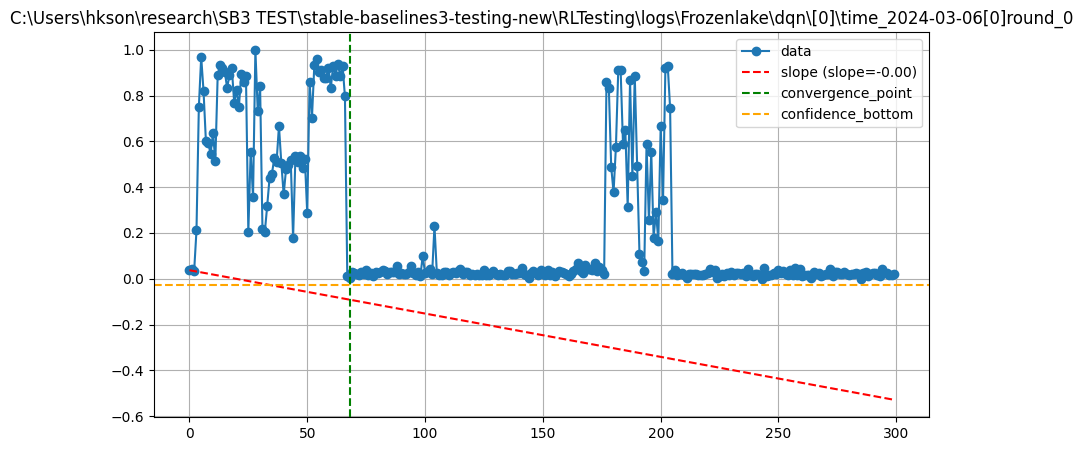

False False False


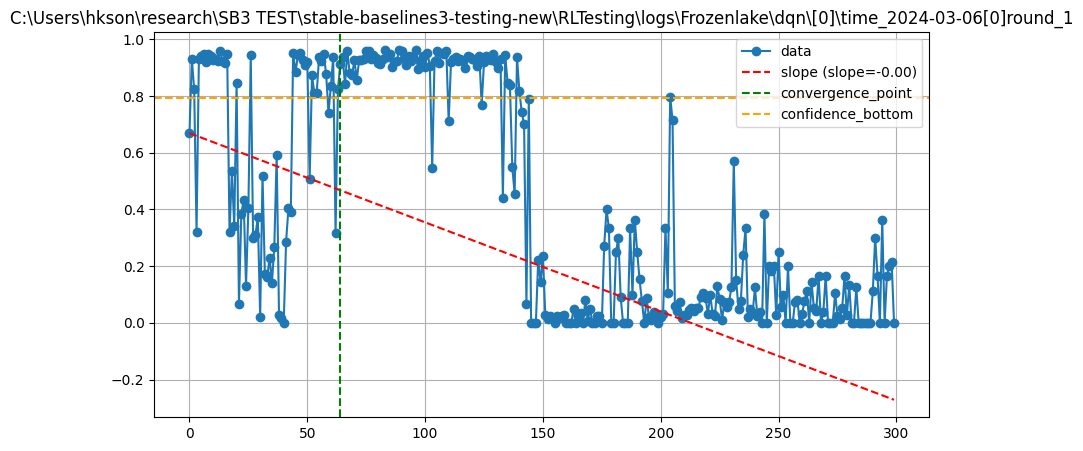

False True False


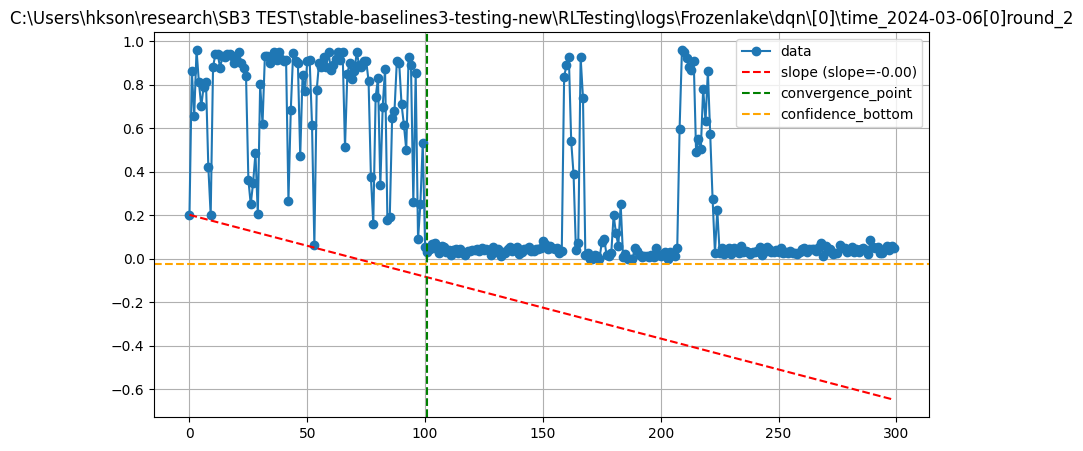

False False False


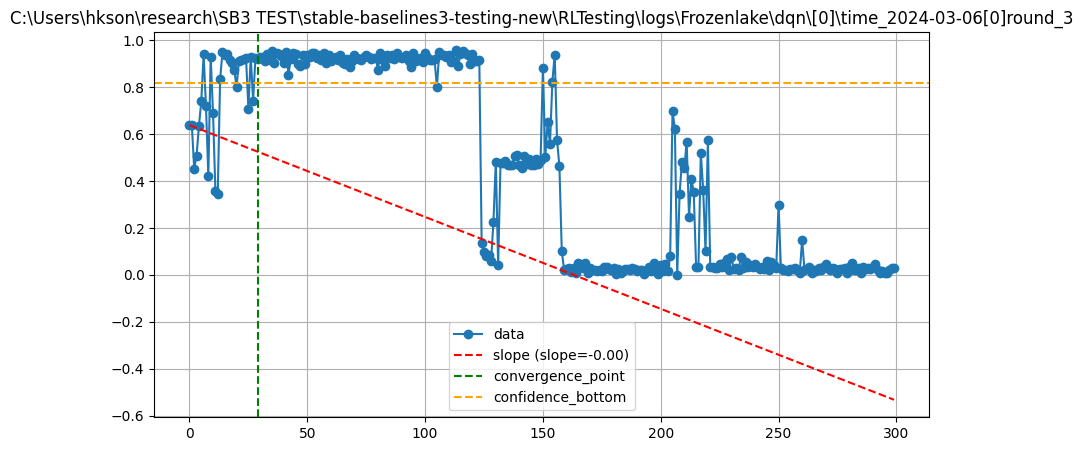

False False False


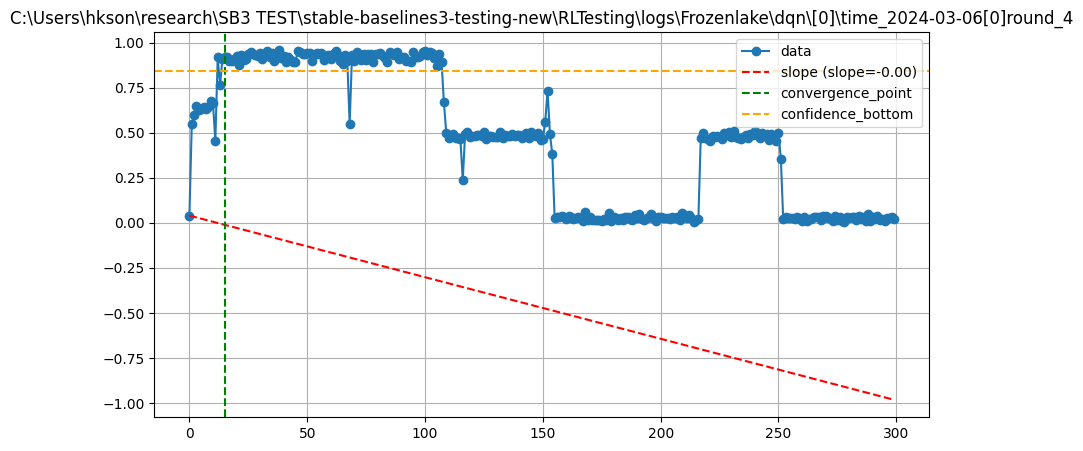

False True False


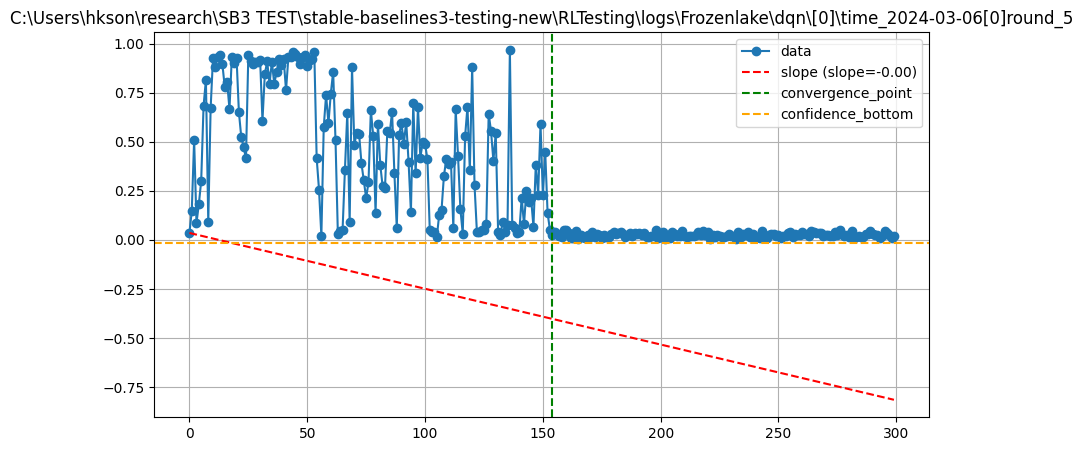

False True False


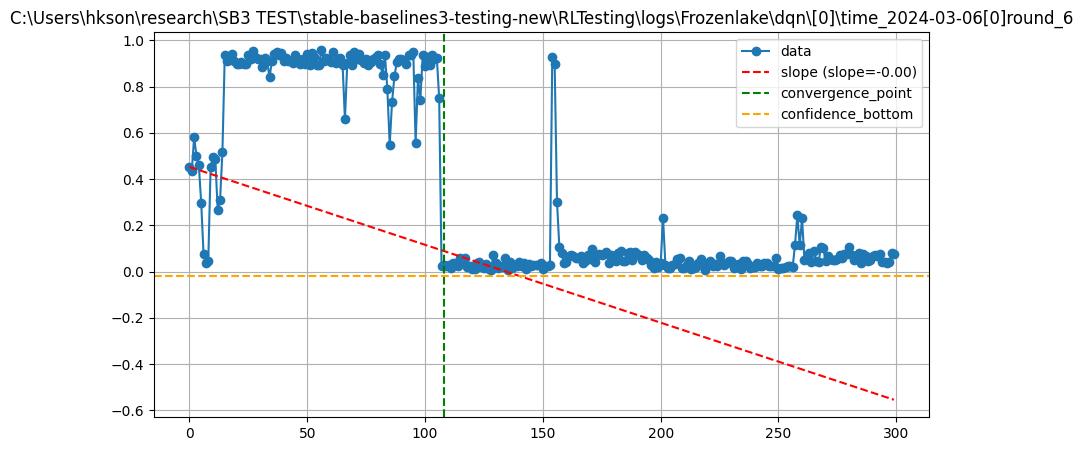

False True False


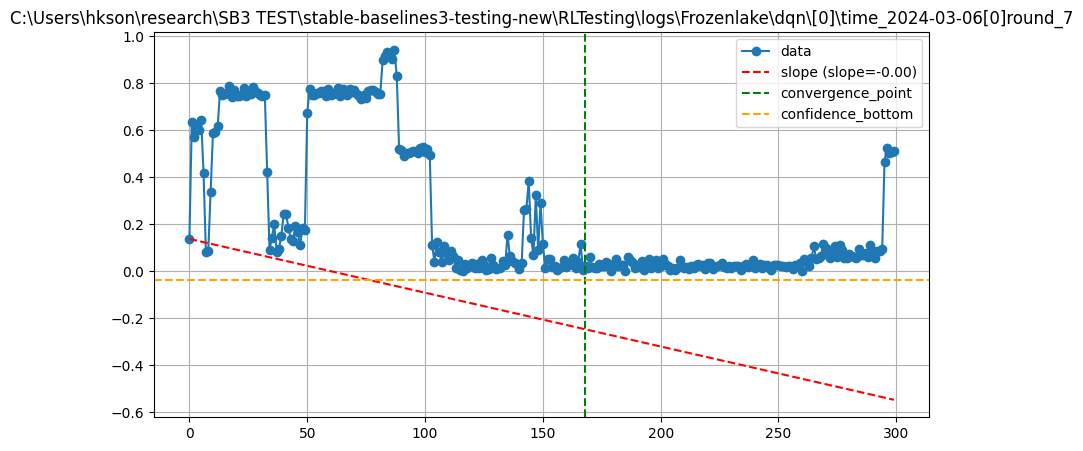

False True False


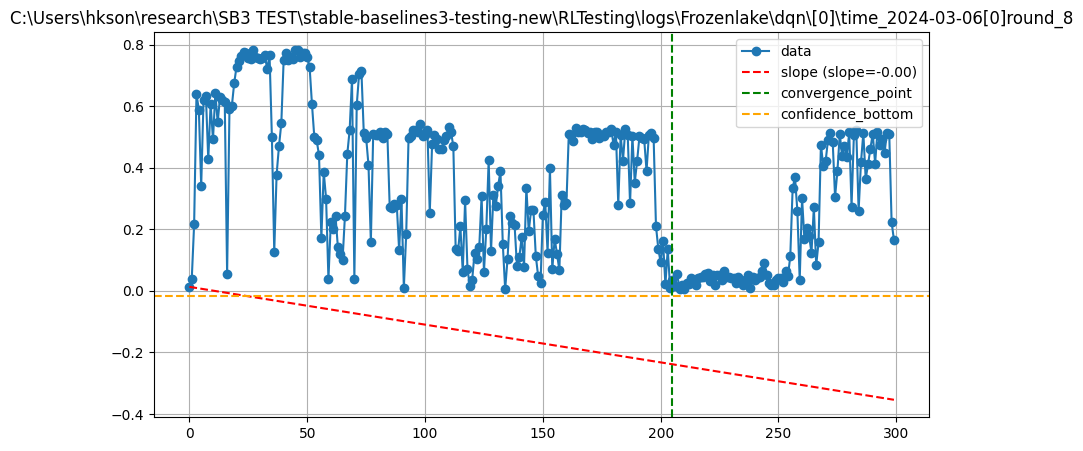

False True False


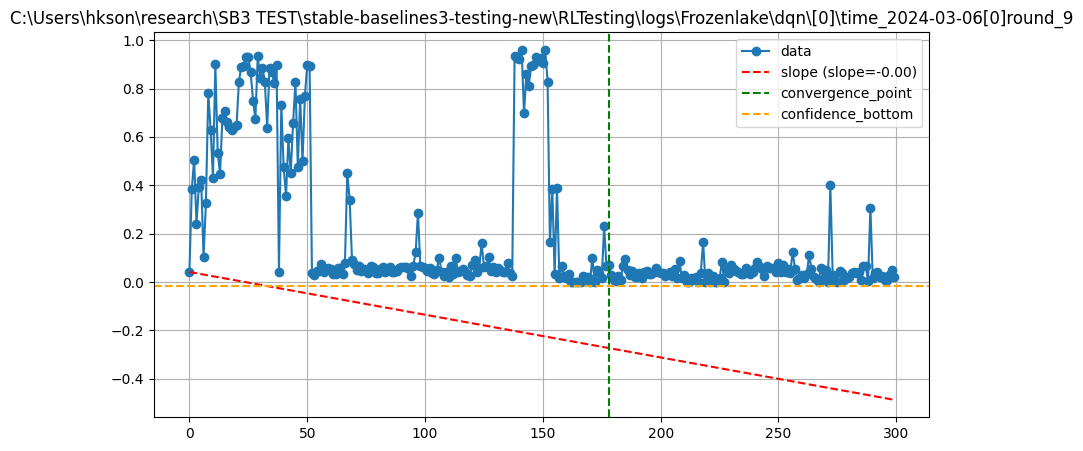

BinomTestResult(k=0, n=10, alternative='greater', statistic=0.0, pvalue=1.0)


In [6]:
# bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'ppo', '[39]')), show_fig=True)
# bin_test_mountaincar(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Mountaincar', 'a2c', '[]')), show_fig=True)
# bin_test_mountaincar(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Mountaincar', 'sac', '[]')), show_fig=True)

bug_list = [0, 1, 2, 4, 6, 9, 10, 16, 17, 18, 19, 20, 21, 22, 23]
# bug_list = [24, 25, 26, 27, 28, 29, 30, 31, 32]

bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[0]')), show_fig=True)
# for bug in bug_list:
#     bug = '[' + str(bug) + ']'
#     print(bug)
#     bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', bug)), show_fig=False)


In [ ]:
# bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[]')), show_fig=False)
# bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'ppo', '[]')), show_fig=True)
# bin_test_mountaincar(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Mountaincar', 'a2c', '[]1')), show_fig=False)


'''-------------------up bugfree--------------------down buggy----------------------'''



bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[0]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[1]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[2]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[4]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[6]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[9]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[10]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[16]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[17]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[18]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[19]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[20]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[21]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[22]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[23]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'dqn', '[24]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'ppo', '[7]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'ppo', '[9]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'a2c', '[24]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'a2c', '[25]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'a2c', '[26]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'a2c', '[27]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'a2c', '[28]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'a2c', '[29]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'a2c', '[30]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'a2c', '[31]')), show_fig=False)
bin_test_frozenlake(bug_free_log_path = Path(os.path.join(root_dir, 'RLTesting', 'logs', 'Frozenlake', 'a2c', '[32]')), show_fig=False)


